In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, join, vstack, hstack
from astropy.coordinates import SkyCoord
import astropy.units as u
from glob import glob
import Euclid

%erun Phosphoros

from PhzCLI.PlotSpecZComparison import compute_stats, displayHistogram, SpeczPhotozPlot

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

In [2]:
truth = vstack([Table.read(p)[['Z_OBS', 'RA_MAG', 'DEC_MAG']] for p in glob('/home/aalvarez/Work/Data/FromEAS/MER_SC8/TU/EUC_MER_TU-GALAXY-CAT*.fits')])

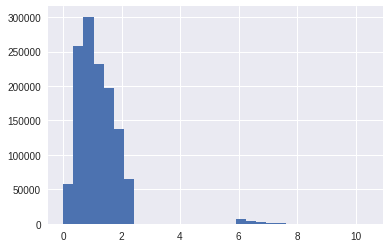

In [13]:
plt.figure()
plt.hist(truth['Z_OBS'], bins=30)
plt.show()

In [3]:
mer = Table.read('/home/aalvarez/Work/Data/PV/Prod/lsst/75769/GalaxyWLStarPSFFilteringTask/catalog_des.fits')[['OBJECT_ID', 'RIGHT_ASCENSION', 'DECLINATION']]

In [4]:
tu_coord = SkyCoord(truth['RA_MAG'], truth['DEC_MAG'])
mer_coord = SkyCoord(mer['RIGHT_ASCENSION'], mer['DECLINATION'])
idx, d2d, _ = tu_coord.match_to_catalog_sky(mer_coord)
mask = d2d < 1 * u.arcsec

In [5]:
mer_tu = hstack([mer[idx[mask]], truth[mask]], 'exact')

WARN: MergeConflictWarning: Cannot merge meta key 'EXTNAME' types <class 'str'> and <class 'str'>, choosing EXTNAME='Galaxy Catalog' [astropy.utils.metadata]
WARN    : MergeConflictWarning: Cannot merge meta key 'EXTNAME' types <class 'str'> and <class 'str'>, choosing EXTNAME='Galaxy Catalog'
2022-08-23T11:21:19CEST astropy  WARN : MergeConflictWarning: Cannot merge meta key 'EXTNAME' types <class 'str'> and <class 'str'>, choosing EXTNAME='Galaxy Catalog'


In [6]:
phosphoros = Table.read('/home/aalvarez/Work/Data/PV/Calib/des_phosphoros.fits')[['ID', 'Z']]
phosphoros.rename_column('ID', 'OBJECT_ID')
phosphoros = join(mer_tu, phosphoros, 'OBJECT_ID')

In [7]:
nnpz = Table.read('/home/aalvarez/Work/Data/PV/Prod/lsst/75769/NnpzDes/output_file.fits', hdu=1)[['OBJECT_ID', 'REDSHIFT_MEDIAN']]
nnpz = join(mer_tu, nnpz, 'OBJECT_ID')

In [8]:
def plot_scatter(catalog, spz: str, phz:str):
    data, mean, median, sigma, mad, nmad, outliersPercent, sigmaNoOutliers, meanNoOutliers = compute_stats(catalog[spz], catalog[phz])
    subset = np.random.choice(len(catalog), 20000)
    SpeczPhotozPlot(catalog['OBJECT_ID'][subset], catalog[spz][subset], catalog[phz][subset], data)

--> Mean                :  -0.018668802002506476
--> Median              :  -0.009815557894021257
--> Sigma               :  0.1852805009836948
--> Mad                 :  0.05371562725081443
--> NMad                :  0.07963878896205746
--> Outliers            :  24.950177147918513 %
--> Sigma (no outliers) :  0.037797267371798435


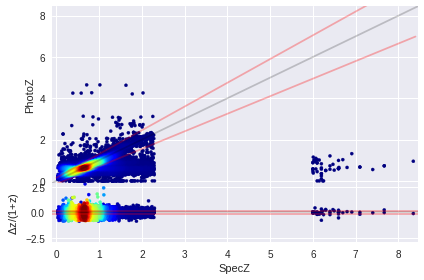

In [9]:
plot_scatter(phosphoros, 'Z_OBS', 'Z')

--> Mean                :  -0.04657663
--> Median              :  -0.01932783
--> Sigma               :  0.18759216
--> Mad                 :  0.045089565
--> NMad                :  0.06684978939145803
--> Outliers            :  19.868246235606733 %
--> Sigma (no outliers) :  0.035929345


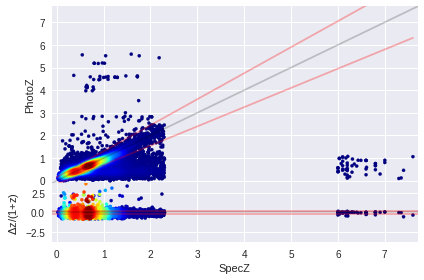

In [10]:
plot_scatter(nnpz, 'Z_OBS', 'REDSHIFT_MEDIAN')

In [11]:
cross = join(nnpz, phosphoros, 'OBJECT_ID')

--> Mean                :  -0.02026208386986622
--> Median              :  -0.011802632801362522
--> Sigma               :  0.15595447243973248
--> Mad                 :  0.029988267298199825
--> NMad                :  0.04446060509631106
--> Outliers            :  11.65398718344128 %
--> Sigma (no outliers) :  0.032490567343809285


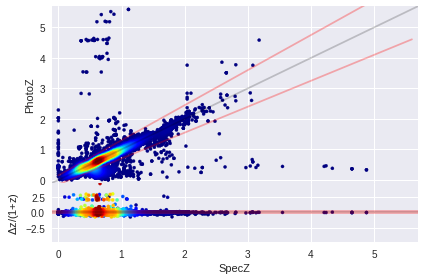

In [12]:
plot_scatter(cross, 'Z', 'REDSHIFT_MEDIAN')